#### Install Dependencies

In [1]:
import random
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images
import tensorflow as tf
from tensorflow import keras

!pip install opencv-python
import cv2

%matplotlib inline

2023-12-13 03:51:50.642790: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 03:51:50.647347: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 03:51:50.718163: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 03:51:50.719872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 03:51:51.876403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Label Name Reference List

In [2]:
# These are the labels associated to the correct index

label_names = ['red','yellow','green']

# Image Preprocessing

### Crop Images Function

In [3]:
# Function to standardize images to 32X32

def standardize_input(image):
    image_crop = np.copy(image)
    row_crop = 7
    col_crop = 8
    image_crop = image[row_crop:-row_crop, col_crop:-col_crop]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
    standard_im = cv2.resize(image_crop, (32, 32))
    return standard_im

### Label, Convert to Grayscale, Normalize Scalar Values, and Shuffle Dataset

In [29]:
# Here I sort and label all the images
# I also convert all the images to grayscale
# When I was trying to input the image with 3 chanels of color tensor flow was throwing an error 
# This converts the tensor from (None, 32, 32, 3) to (None, 32, 32) this allows the tensor to fit to the model

from PIL import Image

data =[]
data_test = []
img_preview = []

for file in glob.glob("trafficLightImages/training/green/*"):
    
    # Read in the image
    im = mpimg.imread(file)
    
    # convert all the images to grayscale
    gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)         
    # Append the image to the green image list
    data.append([gray_image/255,2])
    
for file in glob.glob("trafficLightImages/training/yellow/*"):    
    
    # Read in the image
    im = mpimg.imread(file)   
    
    gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)         
    # Append the image to the green image list
    data.append([gray_image/255,1])
    
for file in glob.glob("trafficLightImages/training/red/*"):
    
    # Read in the image
    im = mpimg.imread(file)
    gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 
    # Append the image to the green image list
    data.append([gray_image/255,0])

for file in glob.glob("trafficLightImages/test/green/*"):
    
    # Read in the image
    im = mpimg.imread(file)
    img_preview.append(im)
    # convert all the images to grayscale
    gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)         
    # Append the image to the green image list
    data_test.append([gray_image/255,2])
    
for file in glob.glob("trafficLightImages/test/yellow/*"):
    
    # Read in the image
    im = mpimg.imread(file) 
    img_preview.append(im)
    gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)         
    # Append the image to the green image list
    data_test.append([gray_image/255,1])
    
for file in glob.glob("trafficLightImages/test/red/*"):
    
    # Read in the image
    im = mpimg.imread(file)
    img_preview.append(im)
    gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 
    # Append the image to the green image list
    data_test.append([gray_image/255,0])

def seed():
    return .2

random.shuffle(data)
random.shuffle(data_test, seed)
random.shuffle(img_preview, seed)

x_train_lst = []
y_train_lst = []
x_test_lst = []
y_test_lst = []

for img in data:
    X_std = standardize_input(img[0]) 
    x_train_lst.append(np.array(X_std))
    y_train_lst.append(img[1])
    
for img in data_test:
    X_std = standardize_input(img[0]) 
    x_test_lst.append(np.array(X_std))
    y_test_lst.append(img[1])


/tmp/ipykernel_8789/804982135.py:71: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(data_test, seed)
/tmp/ipykernel_8789/804982135.py:72: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(img_preview, seed)


### Final Preprocessed Image

(1187, 32, 32)

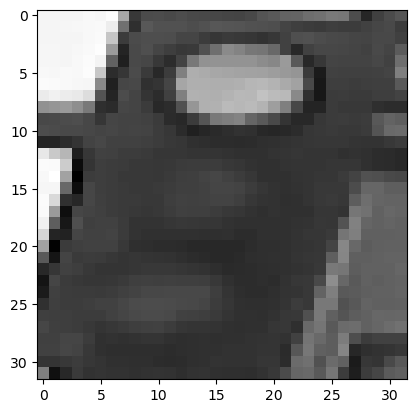

In [5]:
i = 300
plt.imshow(x_train_lst[i],cmap='gray')
test = np.array(x_train_lst)
test.shape

# TensorFlow CNN

### Convert Data to Tensors and Arrays

In [6]:
# TensorFlow Data and Targets/Classes/Labels
x_train_tf = tf.convert_to_tensor(x_train_lst)
x_test_tf = tf.convert_to_tensor(x_test_lst)
targets_tf = np.array(y_train_lst)
test_targets_tf = np.array(y_test_lst)

In [30]:
x_train_tf.shape

TensorShape([1187, 32, 32])

### Epochs

In [7]:
NUM_EPOCHS = 32

## Build Model

### Add Convolusional and Pooling Layers

In [8]:
# Adding two convolutional layers 

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
    
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

model.compute_output_shape(input_shape=(1187, 32, 32, 1))

TensorShape([1187, 8, 8, 64])

### Flatten Tensor for Dense Layer

In [9]:
# flatten the convolutional layer output to pass into dense layers

model.add(tf.keras.layers.Flatten())
    
model.compute_output_shape(input_shape=(1187, 32, 32, 1))

TensorShape([1187, 4096])

### Add Dense and Dropout Layer

In [10]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

# using a Dropout layer to prevent overfitting
model.add(tf.keras.layers.Dropout(
    rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

### Build Model

In [11]:
tf.random.set_seed(1)
model.build(input_shape=(None, 32, 32, 1))

model.compute_output_shape(input_shape=(1187, 32, 32,1))

TensorShape([1187, 10])

## Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              4195328   
                                                                 
 dropout (Dropout)           (None, 1024)              0

## Train Model

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(x=x_train_tf,y=targets_tf, epochs=NUM_EPOCHS, 
                    validation_split=.3, 
                    shuffle=True)

Epoch 1/32
26/26 [==============================] - 4s 104ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0550 - val_accuracy: 0.9804
Epoch 2/32
26/26 [==============================] - 3s 97ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0312 - val_accuracy: 0.9832
Epoch 3/32
26/26 [==============================] - 3s 101ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0564 - val_accuracy: 0.9748
Epoch 4/32
26/26 [==============================] - 3s 104ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0437 - val_accuracy: 0.9832
Epoch 5/32
26/26 [==============================] - 3s 101ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9832
Epoch 6/32
26/26 [==============================] - 3s 101ms/step - loss: 9.5152e-04 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 0.9860
Epoch 7/32
26/26 [==============================] - 3s 101ms/step - loss: 7.8388e-04 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9860

### Evaluation Metrics

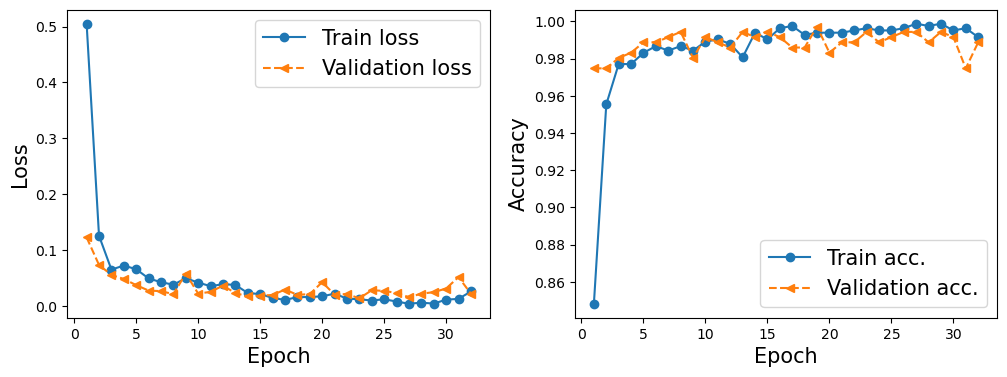

In [14]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(x_test_tf,  test_targets_tf, verbose=2)

print('\nTest accuracy:', test_acc)

10/10 - 0s - loss: 0.0142 - accuracy: 0.9966 - 92ms/epoch - 9ms/step

Test accuracy: 0.996632993221283


## Predict Traffic Lights

TensorShape([297, 10])


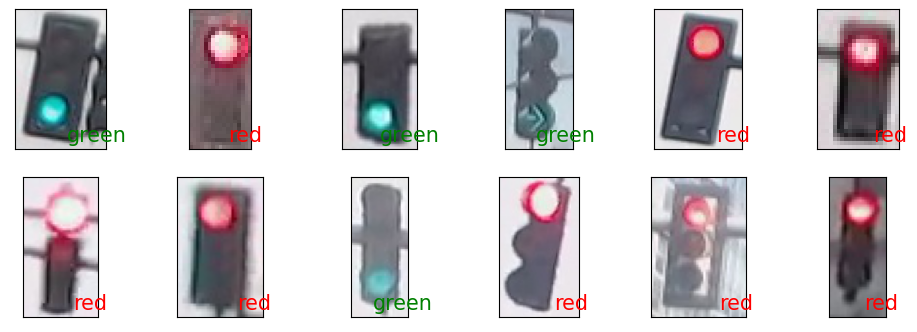

In [16]:
preds = model(x_test_tf)

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = img_preview[i]
    ax.imshow(img)
    ax.text(0.9, 0.1, '{}'.format(label_names[preds[i]]), 
            size=15, color=label_names[preds[i]],
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
#plt.savefig('figures/15_13.png', dpi=300)
plt.show()

# SVM Classifier 

### Convert Input Data

In [17]:
# convert list of arrays into an array of arrays

x_train_ml = np.array(x_train_lst)
y_train_ml = np.array(y_train_lst)
x_test_ml = np.array(x_test_lst)
y_test_ml = np.array(y_test_lst)

In [18]:
print(x_train_ml.shape)
print(y_train_ml.shape)
print(x_test_ml.shape)
print(y_test_ml.shape)

(1187, 32, 32)
(1187,)
(297, 32, 32)
(297,)


### Reshape to a 2D array

In [19]:
# SVM only takes in an array of dimention 2, so I reshape the images for x test and x train 
nsamples, nx, ny = x_train_ml.shape
x_train_ml = x_train_ml.reshape((nsamples,nx*ny))

nsamples2, nx2, ny2 = x_test_ml.shape
x_test_ml = x_test_ml.reshape((nsamples2,nx2*ny2))

In [20]:
x_train_ml.shape

(1187, 1024)

### Create and Fit Model

In [21]:
# after using GridSearch I chose the best parameters of 1 and .0001

from sklearn.svm import SVC
svc = SVC(C=1,kernel='linear',gamma=.0001)
svc.fit(x_train_ml, y_train_ml)

SVC(C=1, gamma=0.0001, kernel='linear')

### GridSearchCV to Find Best Parameters

In [22]:
from sklearn.model_selection import GridSearchCV
svc2 = SVC(kernel='linear')
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc2, param_grid)

grid.fit(x_train_ml, y_train_ml)
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


### KFold to Test for Better Accuracy

In [23]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and store the results
cv_scores = cross_val_score(svc,x_train_ml,y_train_ml, cv=kfold)

np.mean(cv_scores)

0.9722192674538169

### Evaluation Metrics

In [24]:
from sklearn.metrics import classification_report

labels = list(set(y_train_ml))
y_pred = (svc.predict(x_test_ml))

print('0:{0} 1:{1} 2:{2}'.format(label_names[0],label_names[1],label_names[2]))
print(classification_report(y_test_ml, y_pred,labels=labels))

0:red 1:yellow 2:green
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       181
           1       1.00      1.00      1.00         9
           2       0.97      0.98      0.98       107

    accuracy                           0.98       297
   macro avg       0.99      0.99      0.99       297
weighted avg       0.98      0.98      0.98       297



### Confusion Matrix

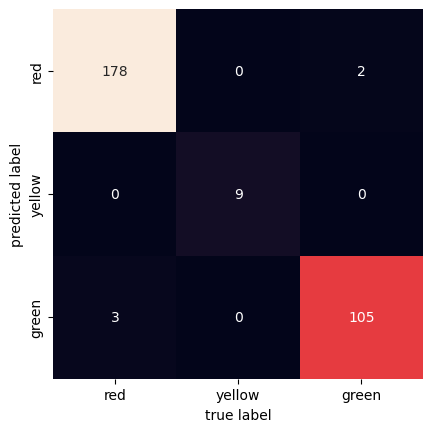

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_ml, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Summary

TensorFlow CNN: <br>
The CNN worked very well, got a test accuracy of 99.3%. There are misclassified red lights, and when looking at the misclassified light it appeared to have sun flare which was most likely the cause of all the misclassifications. In the future I would convert the images into HSV or increase the individual color brightness, but I did not have time to do that.
<br> <br>
SVM: <br>
SVM also preformed very well with a test accuracy of 98%. There are also misclassified red lights, and I beleive it's for the same reason as mentioned above. 
<br> <br>
Final Thoughts: <br>
Would Elon Musk use these in his Teslas, probably not. I would have to preprocess the data better for the red lights to not be misclassified.